
<h1 align="center"><font size="5">Classification with Python</font></h1>




Loading required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About the dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


### Load Data From CSV File


In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,2,2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,3,3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,4,4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 12)

### Convert to date time object


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1,1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,2,2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,3,3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,4,4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [5]:
#df['loan_status'].value_counts()
df['Principal'].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

Checking whether the target variable is balanced

In [6]:
### Which proportion paid and which one is collecting 
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


In [7]:
N = 260-86
df = df.drop(df[df['loan_status'].eq('PAIDOFF')].sample(N).index)

In [8]:
### Which proportion paid and which one is collecting 
df['loan_status'].value_counts()

PAIDOFF       86
COLLECTION    86
Name: loan_status, dtype: int64

Let's plot some columns to underestand data better:


In [9]:
## Install seaborn if needed
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

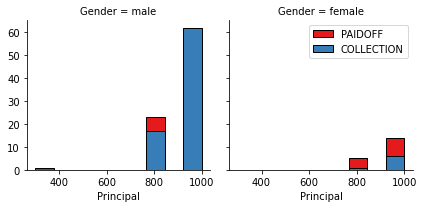

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")


g.axes[-1].legend()
plt.show()

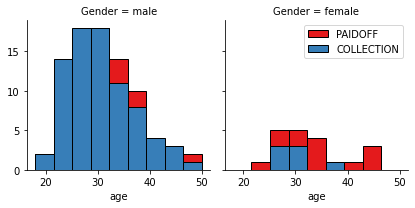

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
# Saving the figure in case is needed
g.savefig('loan_fig_age.png')

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


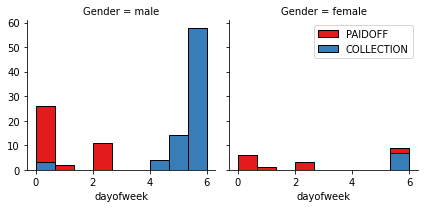

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
13,13,13,15,15,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,5,1
16,16,16,18,18,PAIDOFF,1000,30,2016-09-10,2016-10-09,32,High School or Below,male,5,1
17,17,17,19,19,PAIDOFF,800,30,2016-09-10,2016-10-09,26,college,male,5,1
20,20,20,23,23,PAIDOFF,1000,15,2016-09-10,2016-09-24,26,college,male,5,1
22,22,22,26,26,PAIDOFF,800,15,2016-09-10,2016-09-24,39,Bechalor,male,5,1


## Convert Categorical features to numerical values


Let's look at gender:


In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.730769
        COLLECTION     0.269231
male    COLLECTION     0.541096
        PAIDOFF        0.458904
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
13,13,13,15,15,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,0,5,1
16,16,16,18,18,PAIDOFF,1000,30,2016-09-10,2016-10-09,32,High School or Below,0,5,1
17,17,17,19,19,PAIDOFF,800,30,2016-09-10,2016-10-09,26,college,0,5,1
20,20,20,23,23,PAIDOFF,1000,15,2016-09-10,2016-09-24,26,college,0,5,1
22,22,22,26,26,PAIDOFF,800,15,2016-09-10,2016-09-24,39,Bechalor,0,5,1


## One Hot Encoding

#### How about education?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.521739
                      COLLECTION     0.478261
High School or Below  PAIDOFF        0.506329
                      COLLECTION     0.493671
Master or Above       COLLECTION     1.000000
college               COLLECTION     0.507246
                      PAIDOFF        0.492754
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
13,800,15,26,0,college
16,1000,30,32,0,High School or Below
17,800,30,26,0,college
20,1000,15,26,0,college
22,800,15,39,0,Bechalor


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
13,800,15,26,0,1,0,0,1
16,1000,30,32,0,1,0,1,0
17,800,30,26,0,1,0,0,1
20,1000,15,26,0,1,0,0,1
22,800,15,39,0,1,1,0,0


### Feature Selection


Let's define feature sets, X:


In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
13,800,15,26,0,1,0,0,1
16,1000,30,32,0,1,0,1,0
17,800,30,26,0,1,0,0,1
20,1000,15,26,0,1,0,0,1
22,800,15,39,0,1,1,0,0


What are our lables?


In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.40806923, -1.02366944, -0.87742878, -0.42199786,  0.65828059,
        -0.39288983, -0.92166283,  1.22178297],
       [ 0.56897491,  0.9240202 ,  0.09623412, -0.42199786,  0.65828059,
        -0.39288983,  1.08499548, -0.81847597],
       [-1.40806923,  0.9240202 , -0.87742878, -0.42199786,  0.65828059,
        -0.39288983, -0.92166283,  1.22178297],
       [ 0.56897491, -1.02366944, -0.87742878, -0.42199786,  0.65828059,
        -0.39288983, -0.92166283,  1.22178297],
       [-1.40806923, -1.02366944,  1.23217417, -0.42199786,  0.65828059,
         2.54524279, -0.92166283, -0.81847597]])

# Classification


Use the test set to report the accuracy of the model using the following algorithms 

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

# K Nearest Neighbor(KNN)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (137, 8) (137,)
Test set: (35, 8) (35,)


In [23]:
# Classifier implementing the k-nearest neighbors vote
from sklearn.neighbors import KNeighborsClassifier

In [24]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7883211678832117
Test set Accuracy:  0.7714285714285715


In [25]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62857143, 0.68571429, 0.74285714, 0.74285714, 0.77142857,
       0.74285714, 0.68571429, 0.68571429, 0.68571429, 0.71428571,
       0.65714286, 0.74285714, 0.74285714, 0.71428571, 0.74285714,
       0.71428571, 0.74285714, 0.74285714, 0.74285714])

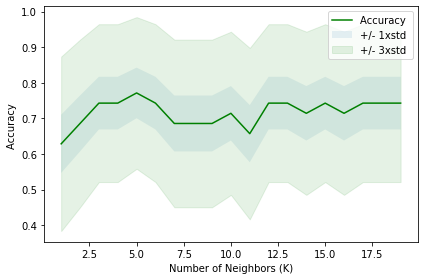

In [26]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7714285714285715 with k= 5


In [28]:
##Reavaluating the model with the bast value for k obtained above 
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7883211678832117
Test set Accuracy:  0.7714285714285715


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import jaccard_score
print('jaccard_score = ',jaccard_score(y_test, yhat,pos_label='PAIDOFF')),
print ('classification_report:\n',classification_report(y_test, yhat))

jaccard_score =  0.5555555555555556
classification_report:
               precision    recall  f1-score   support

  COLLECTION       0.74      0.89      0.81        19
     PAIDOFF       0.83      0.62      0.71        16

    accuracy                           0.77        35
   macro avg       0.79      0.76      0.76        35
weighted avg       0.78      0.77      0.77        35



# Decision Tree


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
# Predicting the values of the loan status 
predTree = loanTree.predict(X_test)

In [34]:
#Evaluation 
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7142857142857143


In [35]:
from sklearn.metrics import jaccard_score
print('jaccard_score = ',jaccard_score(y_test,predTree,pos_label='PAIDOFF')),
print ('classification_report:\n',classification_report(y_test, predTree))

jaccard_score =  0.4117647058823529
classification_report:
               precision    recall  f1-score   support

  COLLECTION       0.67      0.95      0.78        19
     PAIDOFF       0.88      0.44      0.58        16

    accuracy                           0.71        35
   macro avg       0.77      0.69      0.68        35
weighted avg       0.76      0.71      0.69        35



# Support Vector Machine


In [36]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [37]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION'],
      dtype=object)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [39]:
#Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18  1]
 [ 7  9]]


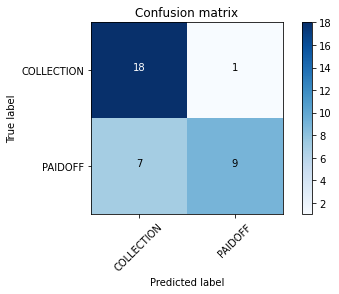

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['COLLECTION', 'PAIDOFF'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

In [41]:
from sklearn.metrics import jaccard_score
print('jaccard_score = ',jaccard_score(y_test, yhat,pos_label='PAIDOFF')),
print ('classification_report:\n',classification_report(y_test, yhat))

jaccard_score =  0.5294117647058824
classification_report:
               precision    recall  f1-score   support

  COLLECTION       0.72      0.95      0.82        19
     PAIDOFF       0.90      0.56      0.69        16

    accuracy                           0.77        35
   macro avg       0.81      0.75      0.76        35
weighted avg       0.80      0.77      0.76        35



# Logistic Regression


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [43]:
yhat = LR.predict(X_test)
yhat[0:5]

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION'],
      dtype=object)

In [44]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.59, 0.41],
       [0.57, 0.43],
       [0.37, 0.63],
       [0.58, 0.42],
       [0.56, 0.44]])

In [45]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6116511495347671

In [46]:
from sklearn.metrics import jaccard_score
print('jaccard_score = ',jaccard_score(y_test, yhat,pos_label='PAIDOFF')),
print ('classification_report:\n',classification_report(y_test, yhat))

jaccard_score =  0.5625
classification_report:
               precision    recall  f1-score   support

  COLLECTION       0.73      1.00      0.84        19
     PAIDOFF       1.00      0.56      0.72        16

    accuracy                           0.80        35
   macro avg       0.87      0.78      0.78        35
weighted avg       0.85      0.80      0.79        35



# Model Evaluation using Test set


In [47]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


### Load Test set for evaluation


In [51]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [52]:
## Convvert the dates to date format 
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
### Day of week from  effective_date
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
### Droping the people on Weekends 
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
#### Replace Gender by 0 for male and 1 for female
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [53]:
### Generating dummy indices for the columns below
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [54]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [55]:
y = test_df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [56]:
#Normalize Data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

# K Nearest Neighbor(KNN)

In [57]:
# Predicting the target variable using the above Data store in X 
yhat_neigh = neigh.predict(X)
print('jaccard_score = ',jaccard_score(y, yhat_neigh,pos_label='PAIDOFF')),
print ('classification_report:\n',classification_report(y, yhat_neigh))

jaccard_score =  0.5116279069767442
classification_report:
               precision    recall  f1-score   support

  COLLECTION       0.38      0.79      0.51        14
     PAIDOFF       0.88      0.55      0.68        40

    accuracy                           0.61        54
   macro avg       0.63      0.67      0.59        54
weighted avg       0.75      0.61      0.63        54



# Decision Tree

In [58]:
# Predicting the values of the loan status 
predTree = loanTree.predict(X)
print('jaccard_score = ',jaccard_score(y,predTree,pos_label='PAIDOFF')),
print ('classification_report:\n',classification_report(y, predTree))

jaccard_score =  0.30952380952380953
classification_report:
               precision    recall  f1-score   support

  COLLECTION       0.31      0.86      0.45        14
     PAIDOFF       0.87      0.33      0.47        40

    accuracy                           0.46        54
   macro avg       0.59      0.59      0.46        54
weighted avg       0.72      0.46      0.47        54



# Support Vector Machine

In [59]:
yhat_svm = clf.predict(X)
print('jaccard_score = ',jaccard_score(y, yhat_svm,pos_label='PAIDOFF')),
print ('classification_report:\n',classification_report(y, yhat_svm))

jaccard_score =  0.5609756097560976
classification_report:
               precision    recall  f1-score   support

  COLLECTION       0.43      0.93      0.59        14
     PAIDOFF       0.96      0.57      0.72        40

    accuracy                           0.67        54
   macro avg       0.70      0.75      0.65        54
weighted avg       0.82      0.67      0.69        54



# Logistic Regression

In [60]:
yhat_LR = LR.predict(X)
yhat_prob_LR = LR.predict_proba(X)
print('Logloss = ',log_loss(y, yhat_prob_LR))
print('jaccard_score = ',jaccard_score(y, yhat_LR,pos_label='PAIDOFF')),
print ('classification_report:\n',classification_report(y, yhat_LR))

Logloss =  0.649548132526379
jaccard_score =  0.5
classification_report:
               precision    recall  f1-score   support

  COLLECTION       0.39      0.86      0.53        14
     PAIDOFF       0.91      0.53      0.67        40

    accuracy                           0.61        54
   macro avg       0.65      0.69      0.60        54
weighted avg       0.78      0.61      0.63        54



# Report

Reporting the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score (paidoff) |F1-score (collectioin)     | LogLoss |
| ------------------ | ------- | --------           | -------                   |         |
| KNN                | 0.51      | 0.68            |     0.51                 | NA      |
| Decision Tree      | 0.31      |  0.47           |    0.45                   | NA      |
| SVM                | 0.56       | 0.72            |    0.59                   | NA      |
| LogisticRegression | 0.50       | 0.67            |    0.53                  | 0.65    |
